## Implementation of Linear regression using python

In [308]:
### import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


## Load the dataset

In [315]:
df1=pd.read_csv("weight-height.csv")
df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,169.034243,163.852461


### Standardize numerical features

In [319]:
col=["Height","Weight"]
S1=MinMaxScaler()
df1[col]=S1.fit_transform(df1[col])
df1


,Gender,Height,Weight
0,Male,0.165212,0.863139
1,Male,0.122482,0.475476
2,Male,0.167432,0.721131
3,Male,0.147361,0.756699
4,Male,0.131761,0.689999
...,...,...,...
9995,Female,0.100470,0.351101
9996,Female,0.108016,0.517161
9997,Female,0.081028,0.310660
9998,Female,0.968224,0.482988


## Prepare dependant and independant variables

In [322]:
X=df1[["Height"]].to_numpy()
Y=df1[["Weight"]].to_numpy()
Y.shape

(10000, 1)

## Split the data into training and test set

In [326]:
 X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=67)

In [328]:
# Create a linear regression model

model=LinearRegression()



Note: Learning more about Linear Regression model here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



In [331]:
## Training  Linear regressions model

In [333]:
model.fit(X_train,Y_train)

LinearRegression()

In [335]:
## Calculating the Mean Squared Error (MSE) and R-squared (R2)
Y_pred=model.predict(X_test)

mse=mean_squared_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)
print(mse)
print(r2)

# Print model coefficients
print(model.coef_[0])
print(model.intercept_)

0.004438047889011719
0.8135299373473692
[3.54709605]
[0.10829265]


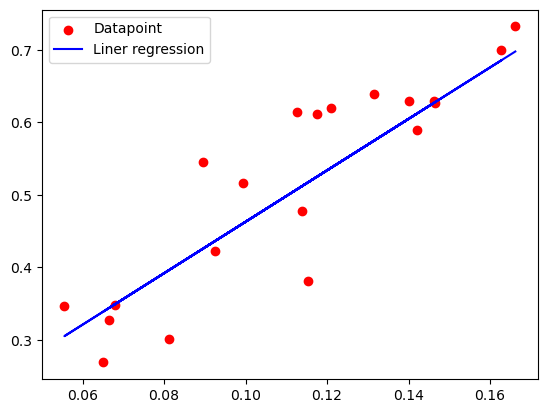

In [337]:
# Plot the linear regression Model
plt.scatter(X_test[0:20],Y_test[0:20],color="Red",label="Datapoint")
plt.plot(X_test[0:20],Y_pred[0:20],color="Blue",label="Liner regression")
plt.legend()


# Gradient descent Scrath implementations

In [340]:
## Load the Height and weight  to indipendent and dependent variable

In [342]:
df2=pd.read_csv("weight-height.csv")
X=df2[["Height"]].to_numpy()
Y=df2["Weight"].values




## 🧠 Z-Score Normalization (Standardization)

The **Z-score** (or **standard score**) measures how many standard deviations a data point is from the mean.

### 📘 Formula

$$
Z = \frac{X - \mu}{\sigma}
$$




In [345]:
## Standardizes the features X and target variable y using Z-score normalization (also called Standardization).
X=(X-np.mean(X))/np.std(X)
Y=(Y-np.mean(Y))/np.std(Y)

In [347]:
#add another feature to X corresponding to bias

X=np.hstack((np.ones((X.shape[0],1)),X))
X.shape

(10000, 2)

In [354]:
# intailize
#Hyper Parameters
m=X.shape[0]
learningrate=0.1
epochs=10000
MSEH=[]
#Learnable Parameters
theta=np.ones((X.shape[1],))

<img src="https://i.postimg.cc/wMYVXD65/1.png" alt="Image Description" width="500">

In [357]:
# Gradient descent is an optimization algorithm
for i in range(epochs):
    Y_pred=np.dot(X,theta)
    MSE=mean_squared_error(Y,Y_pred)
    print(MSE)
    MSEH.append(MSE)
    theta=theta-learningrate*(1/m)*np.dot(X.T,(Y_pred-Y))

1.3111015321641513
1.1165042844066941
0.9588805137231539
0.8312052594694859
0.7277883035240149
0.6440205692081834
0.5761687044123597
0.5212086939277427
0.47669108543520294
0.4406318225562458
0.4114238196242904
0.3877653372494065
0.3686019665257504
0.3530796362395891
0.34050654870779845
0.3303223478070481
0.3220731450774402
0.31539129086645784
0.3099789889555621
0.30559502440773656
0.3020440131239979
0.29916769398416954
0.29683787548090856
0.2949507224932672
0.29342212857327776
0.29218396749808623
0.2911810570271811
0.29036869954574795
0.28971068998578714
0.28917770224221884
0.28874598216992853
0.2883962889113734
0.28811303737194377
0.2878836036250057
0.28769776228998584
0.2875472308086198
0.2874253003087133
0.28732653660378904
0.2872465380028004
0.28718173913599965
0.28712925205389095
0.28708673751738295
0.28705230074281146
0.28702440695540854
0.2870018129876122
0.28698351187369714
0.28696868797142594
0.28695668061058627
0.2869469546483062
0.2869390766188593
0.2869326954150072
0.286927

[-1.59977892e-15  8.44449234e-01]


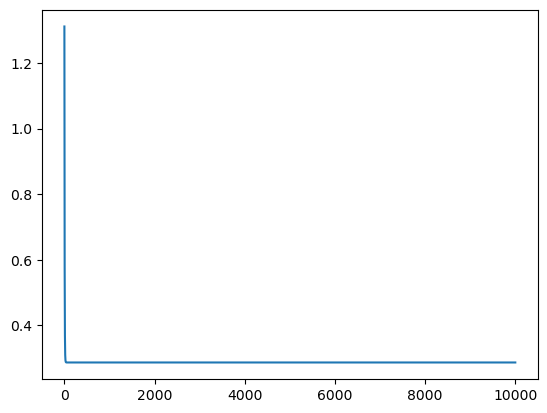

In [359]:
# Loss graph
plt.plot(MSEH)
print(theta)

## You are required to fit a linear function on Food_delivery_times dataset
Description about the dataset: This dataset is designed for predicting food delivery times based on various influencing factors such as distance, weather, traffic conditions, and Preperation time.
1. Feature selection: Consider Food_delivery_time is effected by four features (attributes) given in the dataset, which are Distance_km, Preparation_Time_min, Traffic, Weather
2. Since Traffic, Weather are having categorical values, you need to convert them into numerical using the categorical encoding methods.
3. Now, fit a linear regression model considering Distance_km, Preparation_Time_min, Traffic, and Weather as independant variables and Delivery_Time_min as dependant varibal.


Note: In lab record, you can write the statements relevant to linear regression.